# Graduate Admission Prediction

**Dataset**--
https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

The columns are:

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy import special
 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


**Data ingestion**

In [2]:
df=pd.read_csv("Admission_Predict.csv")

**First few rows of the dataframe**

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Feature names**

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Dimension of dataframe**

In [5]:
df.shape

(500, 9)

**Data type and null values in each feature**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Basic stats description**

In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Check for duplicates**

In [8]:
df.duplicated().sum()

0

In [9]:
 # Chance of Admit is having discrete values that's why it's not the correct way to check its importance.
columns = df.columns.tolist()
columns.remove("Chance of Admit ") 

**Performing ANOVA Test to Analyze the Features Importance**

In [10]:
f_scores = {}
p_values = {}

for column in columns:
    f_score, p_value = stats.f_oneway(df[column],df["Chance of Admit "])
    
    f_scores[column] = f_score
    p_values[column] = p_value

**Visualizing the F_Score of ANOVA Test of Features**

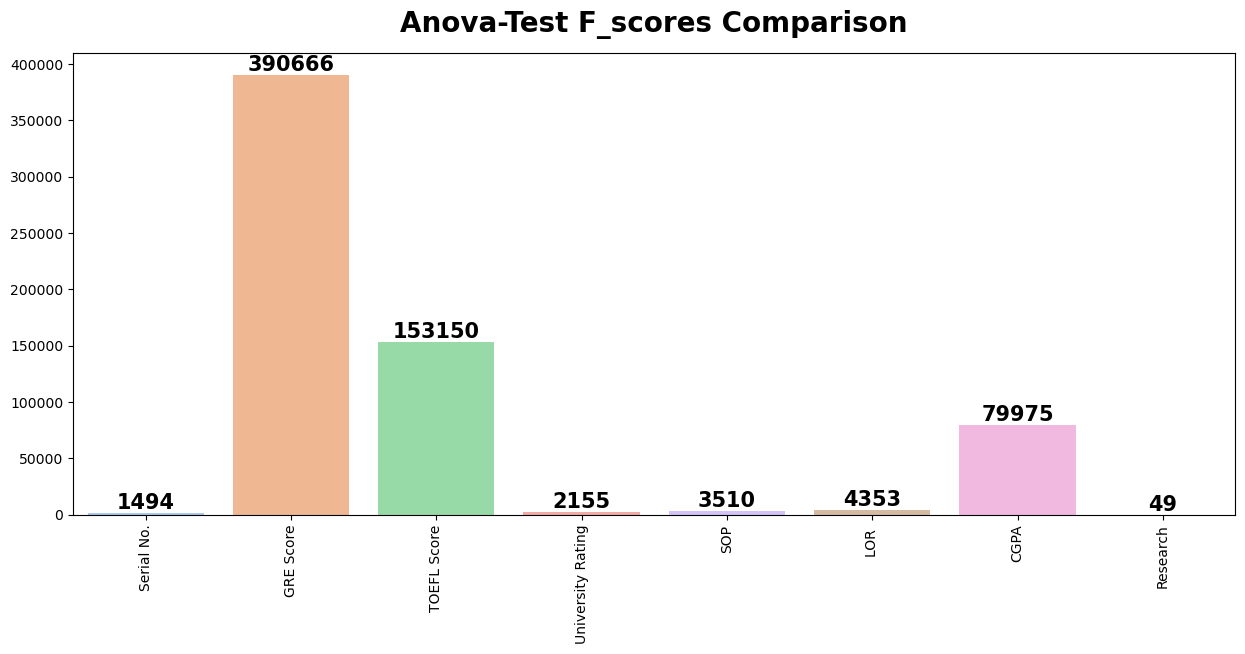

In [11]:
plt.figure(figsize=(15,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values, palette="pastel")
plt.title("Anova-Test F_scores Comparison",fontweight="black",size=20,pad=15)
plt.xticks(rotation=90)

for index,value in enumerate(values):
    plt.text(index,value,int(value), ha="center", va="bottom",fontweight="black",size=15)
plt.show()

**Comparing F_Score and P_value of ANOVA Test**

In [12]:
test_df = pd.DataFrame({"Features":keys,"F_Score":values})
test_df["P_value"] = list(p_values.values())

In [13]:
test_df

,Features,F_Score,P_value
0,Serial No.,1494.350171,1.483454e-200
1,GRE Score,390666.122051,0.000000e+00
2,TOEFL Score,153150.660546,0.000000e+00
3,University Rating,2155.456161,1.432903e-251
4,SOP,3510.190319,0.000000e+00
5,LOR,4353.192585,0.000000e+00
6,CGPA,79975.694955,0.000000e+00
7,Research,49.022518,4.641939e-12


**Correlation**

In [14]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


**Heatmap**

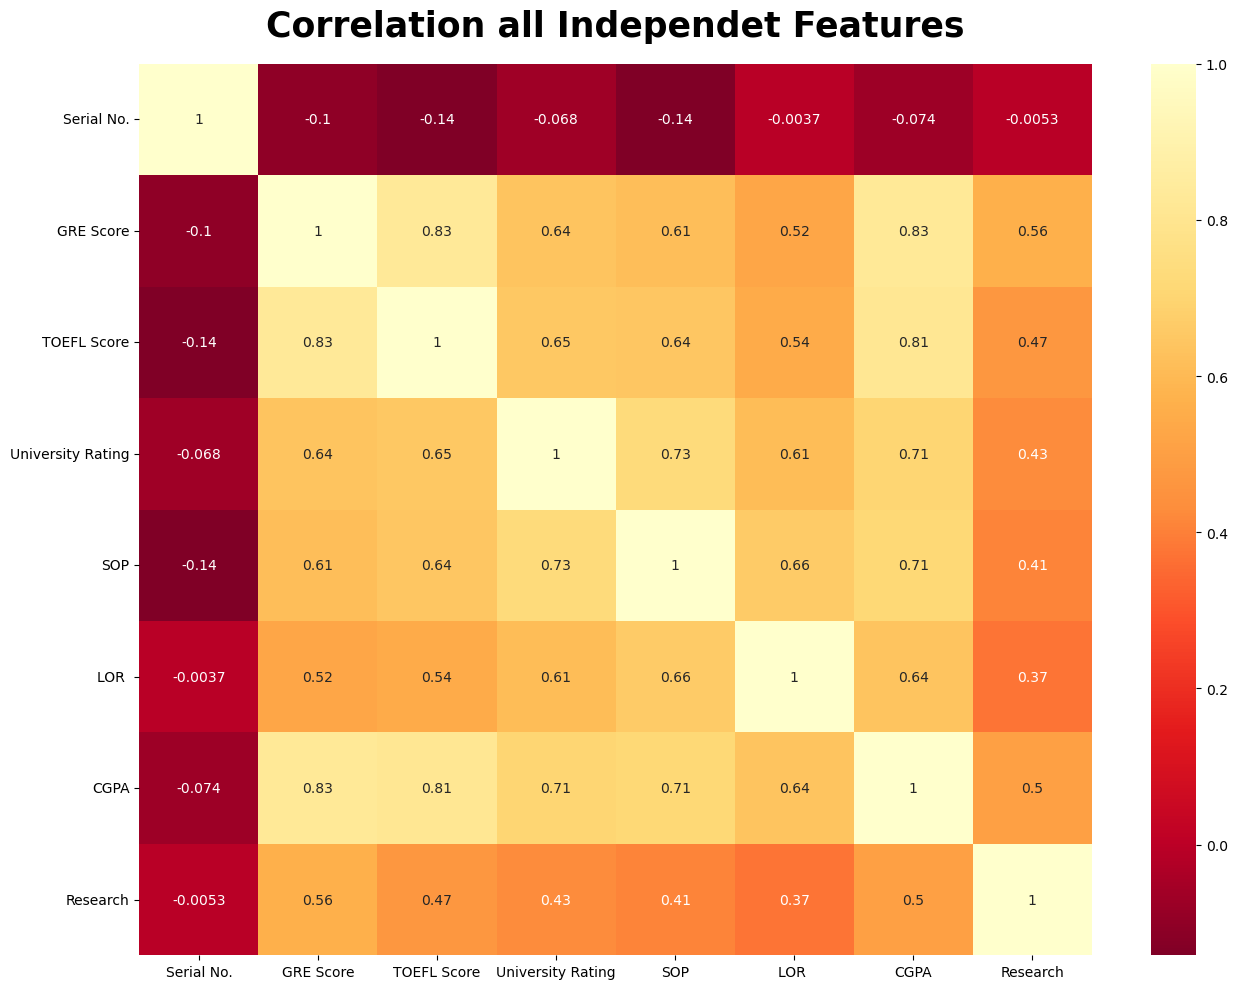

In [15]:
corr = df[columns].corr()

plt.figure(figsize=(13.5,10))

sns.heatmap(corr,fmt=".2g",annot=True ,cmap='YlOrRd_r')
plt.title("Correlation all Independet Features",fontweight="black",size=25,pad=20)
plt.tight_layout()
plt.show()

**Analysis of distribution of features using histplot**

In [16]:
new_df  = df.copy()
columns = df.columns.tolist()
columns.remove("Chance of Admit ")

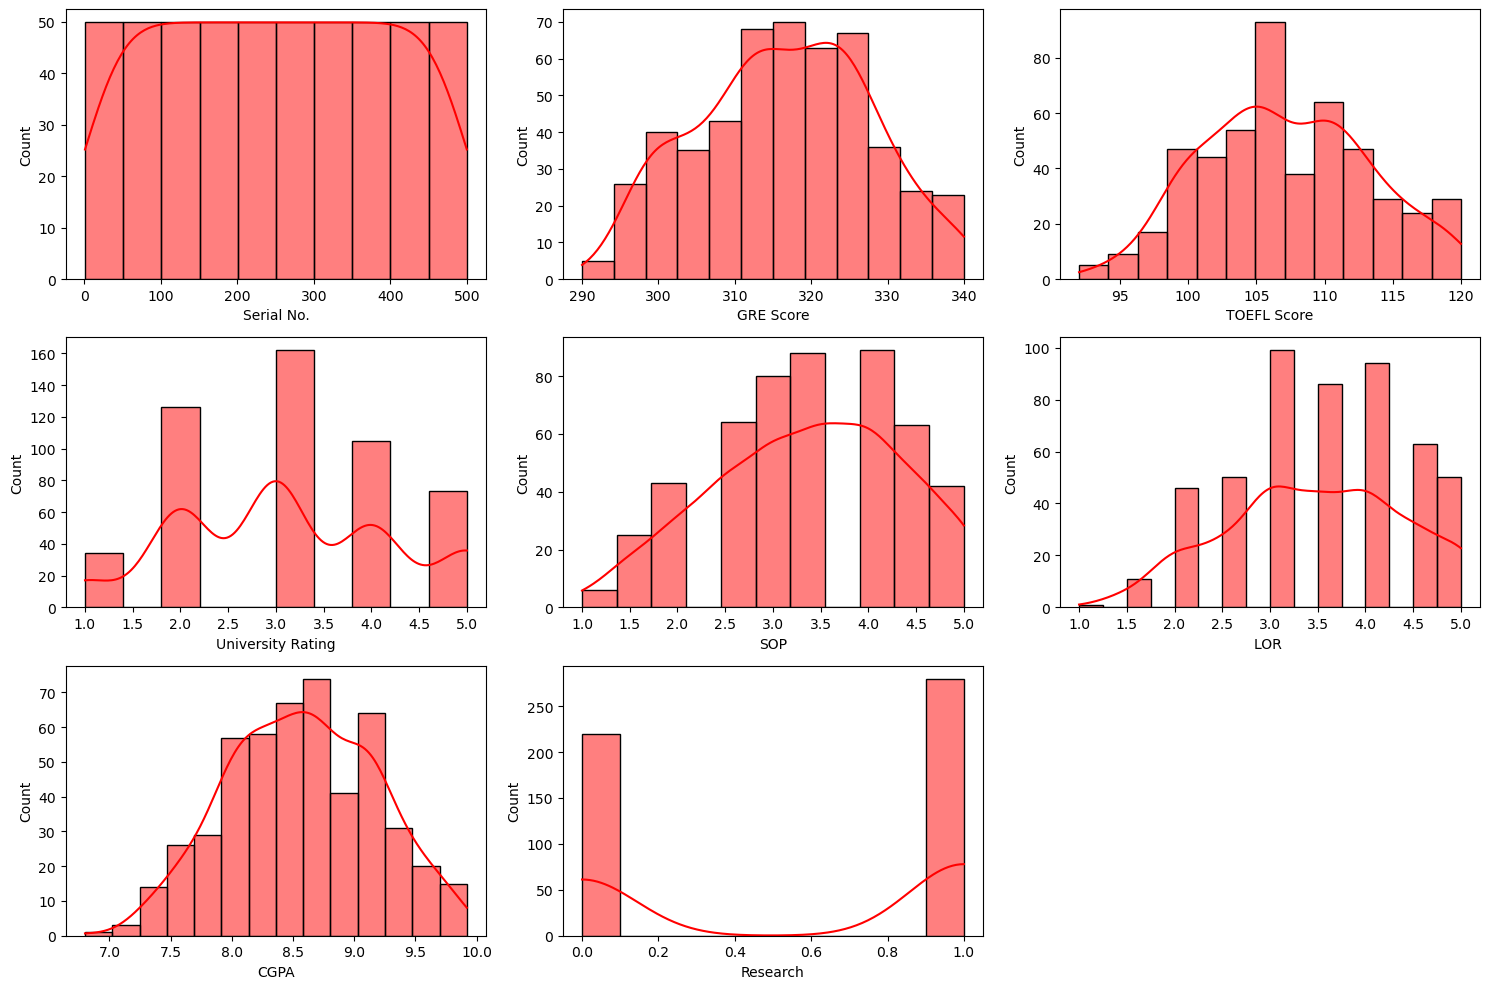

In [17]:
plt.figure(figsize=(15, 10))

for i in range(0, len(columns)):
    plt.subplot(3, 3, i+1)
    sns.histplot(x=df[columns[i]], kde=True, color='r')
    plt.xlabel(columns[i])
    plt.tight_layout()

**Splitting the data**

In [18]:
# Dependent and independent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [20]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

**Train Test Split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=10)

**Scaling**

In [22]:
# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

**Model - Support Vector Regressor**

In [23]:
model = SVR()

In [24]:
model.fit(X_train,y_train)

SVR()

In [25]:
# Make predictions on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics for training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for testing data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)
print("Testing MSE:", mse_test)
print("Testing R-squared:", r2_test)

Training MSE: 0.004038778823861446
Training R-squared: 0.8079337191728695
Testing MSE: 0.004142157693268684
Testing R-squared: 0.7592891452611421
